<a href="https://colab.research.google.com/github/Nancy727/GameOfThronesNlp/blob/main/GameOfThrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
!pip install gensim

In [35]:
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [36]:
import gensim
import os

In [37]:
from google.colab import files
uploaded = files.upload()


Saving data.zip to data (2).zip


In [38]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')


In [50]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
from nltk import sent_tokenize
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
stop_words = set(stopwords.words('english'))

story = []

for filename in os.listdir('data'):
    file_path = os.path.join('data', filename)

    with open(file_path, encoding='utf-8', errors='ignore') as f:
        corpus = f.read()

    raw_sent = sent_tokenize(corpus)

    for sent in raw_sent:
        tokens = simple_preprocess(sent)
        filtered_tokens = [word for word in tokens if word not in stop_words]
        story.append(filtered_tokens)


In [52]:
story

[['clash',
  'kings',
  'book',
  'two',
  'song',
  'ice',
  'fire',
  'george',
  'martin',
  'prologue',
  'comet',
  'tail',
  'spread',
  'across',
  'dawn',
  'red',
  'slash',
  'bled',
  'crags',
  'dragonstone',
  'like',
  'wound',
  'pink',
  'purple',
  'sky'],
 ['maester', 'stood', 'windswept', 'balcony', 'outside', 'chambers'],
 ['ravens', 'came', 'long', 'flight'],
 ['droppings',
  'speckled',
  'gargoyles',
  'rose',
  'twelve',
  'feet',
  'tall',
  'either',
  'side',
  'hellhound',
  'wyvern',
  'two',
  'thousand',
  'brooded',
  'walls',
  'ancient',
  'fortress'],
 ['first',
  'came',
  'dragonstone',
  'army',
  'stone',
  'grotesques',
  'made',
  'uneasy',
  'years',
  'passed',
  'grown',
  'used'],
 ['thought', 'old', 'friends'],
 ['three', 'watched', 'sky', 'together', 'foreboding'],
 ['maester', 'believe', 'omens'],
 ['yet'],
 [],
 [],
 ['old',
  'cressen',
  'never',
  'seen',
  'comet',
  'half',
  'bright',
  'yet',
  'color',
  'terrible',
  'color',
  

In [53]:
model=gensim.models.Word2Vec(
    window=11,
    min_count=2
)

In [54]:
model.build_vocab(story)

In [55]:
model.train(story,total_examples=model.corpus_count,epochs=model.epochs)

(4416740, 4596315)

In [56]:
model.wv.most_similar('daenerys')

[('unburnt', 0.9243499636650085),
 ('stormborn', 0.9063366055488586),
 ('targaryen', 0.8329879641532898),
 ('regent', 0.8309965133666992),
 ('elia', 0.8303158283233643),
 ('dornes', 0.8237637281417847),
 ('conspired', 0.8178267478942871),
 ('dorans', 0.8127168416976929),
 ('staunchest', 0.8100619912147522),
 ('dorne', 0.8081372380256653)]

In [57]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [59]:
model.wv.doesnt_match(['cersei','jaime','bronn','tyrion'])

'bronn'

In [60]:
model.wv['king']

array([-2.68087   ,  0.69154835, -0.4058848 ,  2.014248  , -0.07283138,
       -1.3912102 , -0.88805705,  2.0468638 ,  0.34146613, -2.0222487 ,
        0.87293375, -1.0389435 , -1.5531865 ,  1.4497435 , -0.91180116,
        1.2550426 ,  1.8421937 , -1.5059229 ,  0.18260683, -1.2109526 ,
       -0.5433641 ,  1.6863954 ,  1.0274401 , -3.1416197 ,  1.662874  ,
       -0.07088019, -0.8260406 ,  0.94395405, -0.3752007 , -0.3352564 ,
        1.0294617 ,  0.38045713,  1.2246343 ,  3.397714  , -2.032645  ,
       -0.522763  ,  0.20808062,  0.26414725,  0.292622  ,  0.8499919 ,
        1.1891564 ,  1.6039907 ,  0.2357776 , -0.3370946 , -0.17348185,
        1.6572835 , -0.02709223, -2.1642756 , -0.15021034, -0.69239736,
        1.1462108 ,  1.5702851 , -1.4062701 ,  1.121992  , -0.562239  ,
       -0.92313546, -0.17142946,  0.2257952 , -0.21976666, -0.5696278 ,
       -0.166283  ,  2.7951994 , -1.0916982 , -0.67869455, -3.238902  ,
       -0.26375362, -0.9945638 ,  0.46151447,  0.20998256,  0.26

In [61]:
model.wv.similarity('arya','sansa')

0.81029415

In [62]:
model.wv.get_normed_vectors()

array([[ 0.05378275,  0.10512453, -0.00872081, ...,  0.04707863,
        -0.07312248,  0.2307189 ],
       [-0.13416228,  0.02272198,  0.11289079, ..., -0.01404815,
        -0.1741044 ,  0.13224249],
       [-0.11043847,  0.03700469,  0.03476438, ...,  0.03876105,
         0.03432544, -0.10265853],
       ...,
       [-0.16656566, -0.01389179,  0.03201408, ..., -0.07476256,
        -0.14826693,  0.11355311],
       [-0.07566357,  0.09574235, -0.03806993, ..., -0.17206605,
         0.06063785,  0.09705314],
       [ 0.01747322,  0.02275367, -0.05606658, ..., -0.22921081,
         0.17540067,  0.046271  ]], dtype=float32)

In [63]:
y=model.wv.index_to_key

In [64]:
y

['said',
 'lord',
 'would',
 'one',
 'ser',
 'could',
 'man',
 'men',
 'back',
 'king',
 'well',
 'like',
 'jon',
 'old',
 'hand',
 'even',
 'never',
 'tyrion',
 'see',
 'know',
 'made',
 'father',
 'eyes',
 'black',
 'told',
 'thought',
 'lady',
 'time',
 'long',
 'might',
 'us',
 'come',
 'still',
 'face',
 'head',
 'red',
 'way',
 'page',
 'boy',
 'must',
 'good',
 'two',
 'little',
 'brother',
 'took',
 'came',
 'though',
 'say',
 'night',
 'three',
 'away',
 'queen',
 'dead',
 'son',
 'blood',
 'take',
 'go',
 'half',
 'make',
 'arya',
 'saw',
 'white',
 'day',
 'first',
 'jaime',
 'look',
 'want',
 'much',
 'enough',
 'tell',
 'sword',
 'great',
 'looked',
 'bran',
 'girl',
 'left',
 'knew',
 'asked',
 'gave',
 'called',
 'wall',
 'every',
 'heard',
 'maester',
 'yet',
 'went',
 'let',
 'sansa',
 'turned',
 'need',
 'behind',
 'dany',
 'around',
 'another',
 'beneath',
 'across',
 'snow',
 'keep',
 'gods',
 'found',
 'knight',
 'woman',
 'gold',
 'last',
 'grace',
 'castle',
 'th

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca=PCA(n_components=3)

In [67]:
X=pca.fit_transform(model.wv.get_normed_vectors())

In [68]:
X.shape

(17726, 3)

In [69]:
import plotly.express as px
fig=px.scatter_3d(X[200:300],x=0,y=1,z=2,color=y[200:300])
fig.show()

In [76]:

from collections import Counter
from wordcloud import WordCloud



In [77]:
main_characters = ['jon', 'daenerys', 'tyrion', 'cersei', 'arya', 'sansa', 'bran']
all_words = [word for sent in story for word in sent]
word_freq = Counter(all_words)

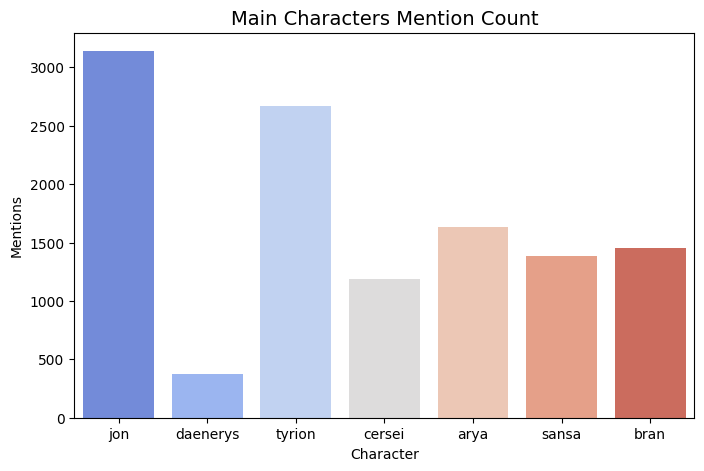

In [80]:
char_freq = {char: word_freq[char] for char in main_characters}
plt.figure(figsize=(8,5))
sns.barplot(x=list(char_freq.keys()), y=list(char_freq.values()), palette='coolwarm')
plt.title("Main Characters Mention Count", fontsize=14)
plt.xlabel("Character")
plt.ylabel("Mentions")
plt.show()

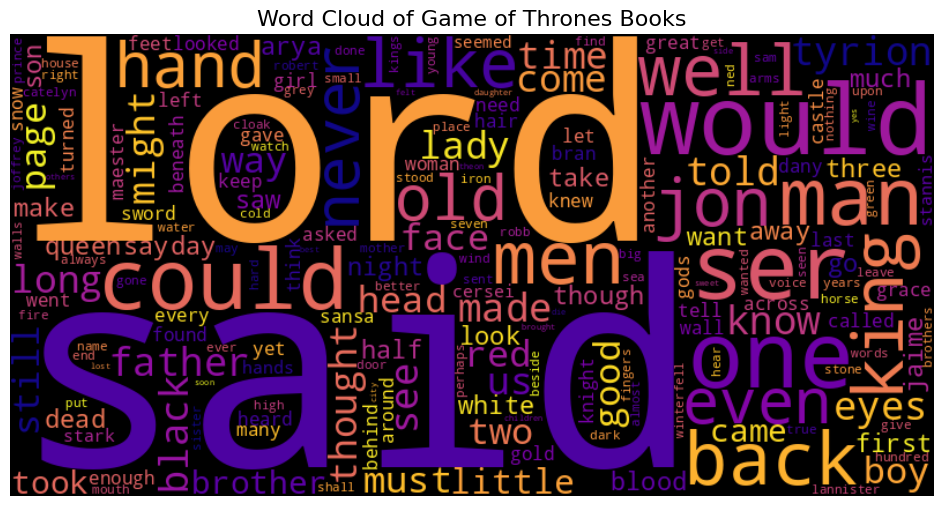

In [79]:
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Game of Thrones Books", fontsize=16)
plt.show()

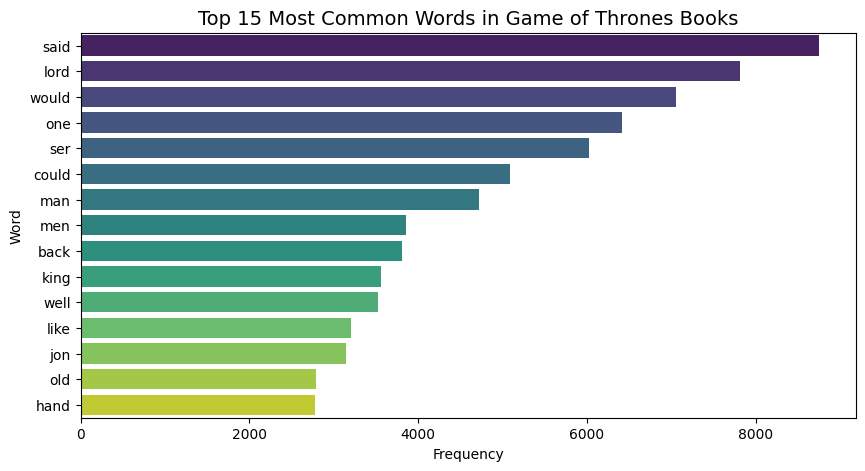

In [78]:
top_words = dict(word_freq.most_common(15))
plt.figure(figsize=(10,5))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette='viridis')
plt.title("Top 15 Most Common Words in Game of Thrones Books", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

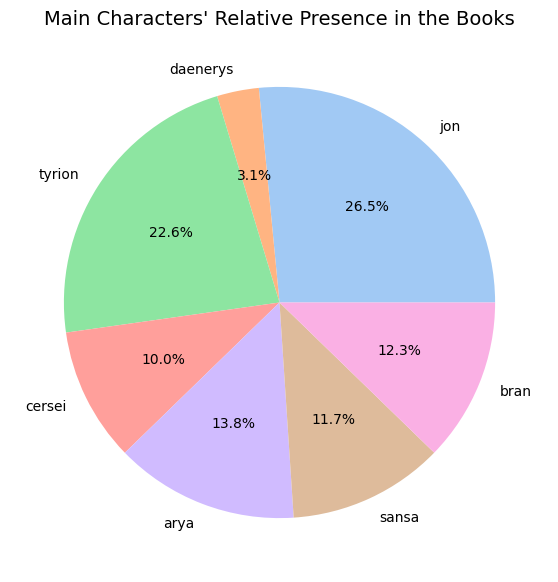

In [81]:
plt.figure(figsize=(7,7))
plt.pie(char_freq.values(), labels=char_freq.keys(), autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Main Characters' Relative Presence in the Books", fontsize=14)
plt.show()

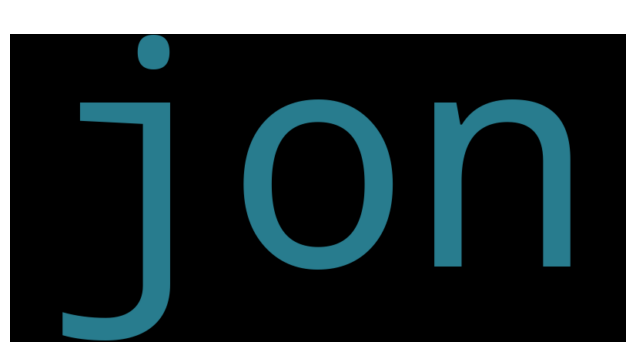

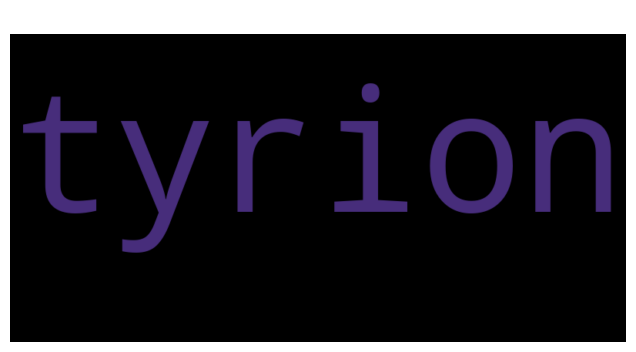

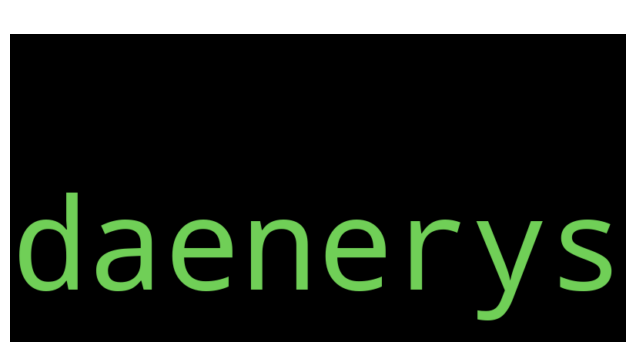

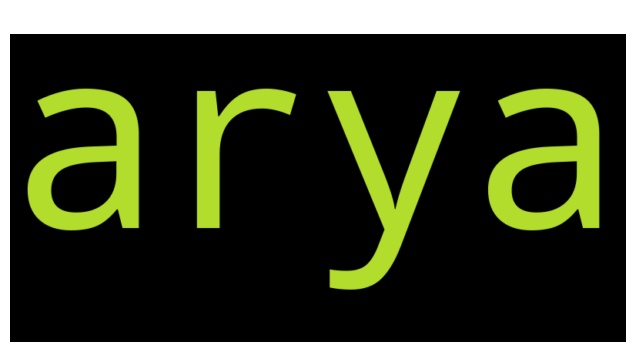

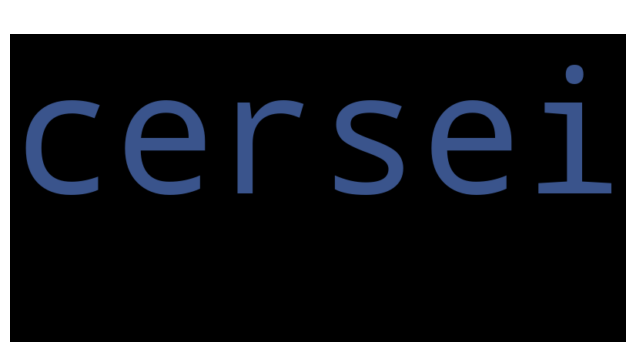

In [83]:
main_characters = ["jon", "tyrion", "daenerys", "arya", "cersei"]
for char in main_characters:
    char_words = [w for w in all_words if w == char]
    if char_words:
        wc_char = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(' '.join(char_words))
        plt.figure(figsize=(8, 4))
        plt.imshow(wc_char, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud - {char.capitalize()}", fontsize=16, color='white')
        plt.show()